In [2]:
%matplotlib inline

from database.DataBaseModels import *

import networkx as nx
import json

In [3]:
author_graph = nx.MultiDiGraph()

In [4]:
for citation in db.Citation.select():
    for author_to in citation.article_id.article__author_article.author_id:
        for author_from in citation.cited_by.article__author_article.author_id:
            author_graph.add_edge(author_from, author_to)

In [5]:
print(len(author_graph.edges))
print(len(author_graph.nodes))

104307
5791


In [6]:
# Removing selfloops edges
author_graph.remove_edges_from([edge for edge in author_graph.selfloop_edges()])

In [8]:
# List of authors pairs who cited each other
result = []

for node in author_graph.nodes:
    for successor in author_graph.successors(node):
        if node in author_graph.successors(successor):
            result.append([successor, node])


for sublist in result:
    result.remove([sublist[1], sublist[0]])

In [9]:
json_file = open('authors_pairs.json', 'w')

json.dump({tup[0]:[tup[1][0].author_id, tup[1][1].author_id] for tup in enumerate(result)}, json_file)

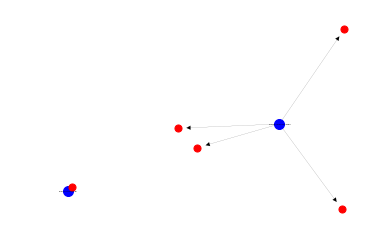

In [13]:
graph = nx.MultiDiGraph()

for sublist in result:
    for author in sublist:
        graph.add_node(author, label=author.name)

graph.add_edges_from(result)

pos=nx.spring_layout(graph)

plt.axis('off')

nodelist_big = [node for node in graph.nodes if node.citations_counter > 400]
nodelist_little = [successor for node in nodelist_big for successor in graph.successors(node) if successor not in nodelist_big]
edgelist = [edge for edge in graph.edges if edge[0] in nodelist_big]
labels_big = {node:node.name for node in nodelist_big}


nx.draw_networkx_nodes(graph, 
                 pos, 
                 nodelist = nodelist_big,
                 node_size = 100,
                 node_color = 'b'
                )

nx.draw_networkx_nodes(graph, 
                 pos, 
                 nodelist = nodelist_little,
                 node_size = 50,
                 node_color = 'r'
                )

nx.draw_networkx_labels(graph,
                       pos,
                       labels = labels_big,
                       font_size = 2)

nx.draw_networkx_edges(graph,
                      pos,
                      edgelist = edgelist,
                      width = 0.1)

plt.savefig("author_pairs.png", dpi=1000)

In [ ]:
from bokeh.models.graphs import NodesAndLinkedEdges
from bokeh.models import Circle, HoverTool, MultiLine, Plot, Range1d

G = nx.karate_club_graph()

# We could use figure here but don't want all the axes and titles
#plot = Plot(x_range=Range1d(-1.1,1.1), y_range=Range1d(-1.1,1.1))

# Create a Bokeh graph from the NetworkX input using nx.spring_layout
graph = from_networkx(graph_1, nx.spring_layout, scale=2, center=(0,0))
plot.renderers.append(graph)

# Blue circles for nodes, and light grey lines for edges
graph.node_renderer.glyph = Circle(size=25, fill_color='#2b83ba')
graph.edge_renderer.glyph = MultiLine(line_color="#cccccc", line_alpha=0.8, line_width=2)

# green hover for both nodes and edges
graph.node_renderer.hover_glyph = Circle(size=25, fill_color='#abdda4')
graph.edge_renderer.hover_glyph = MultiLine(line_color='#abdda4', line_width=4)

# When we hover over nodes, highlight adjecent edges too
graph.inspection_policy = NodesAndLinkedEdges()

plot.add_tools(HoverTool(tooltips=None))

show(plot)

In [52]:
%%opts Graph [tools=['hover']]
graph_1 = nx.MultiDiGraph()

for sublist in result:
    for author in sublist:
        graph_1.add_node(author.name, label=author.name)

graph_1.add_edges_from([[edge[0].name, edge[1].name] for edge in result])

hv.Graph.from_networkx(graph_1, nx.layout.circular_layout)

:Graph   [start,end]